In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

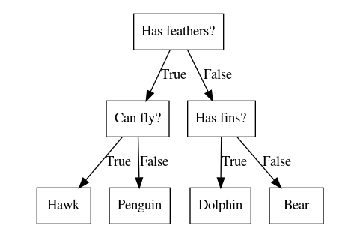

In [2]:
# 區分這幾種動物的決策樹
mglearn.plots.plot_animal_tree()

In [6]:
# 控制決策樹的復雜度
# 在 scikit-learn 上的決策樹是用 DecisionTreeRegressor 和 DecisionTreeClassifier 類別來執行的。 scikit-learn 只有預修剪的功能，沒有後修剪。

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# 限制決策樹的深度， max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("==== max_depth=4 ====")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937
==== max_depth=4 ====
Accuracy on training set: 0.988
Accuracy on test set: 0.951


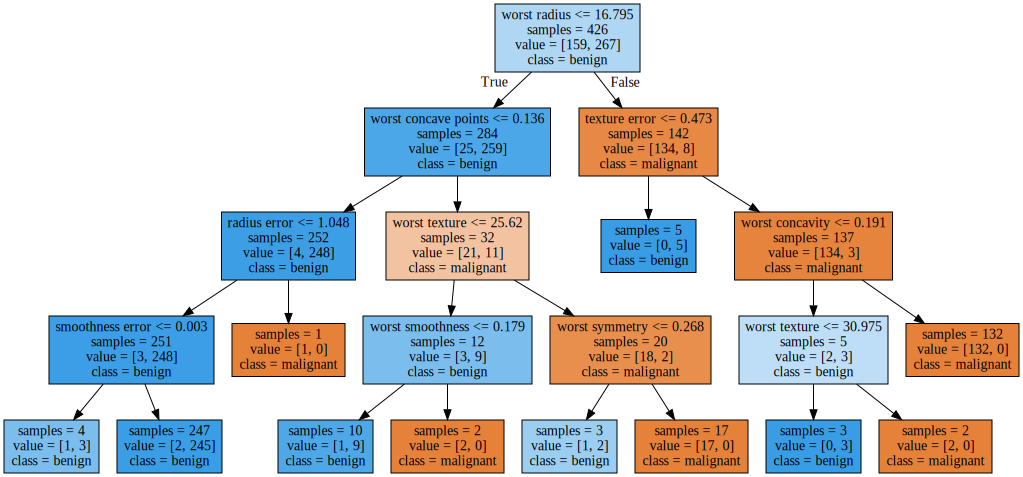

In [7]:
# 分析決策樹
# 用乳癌資料集建立的決策樹可視圖
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=tree)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


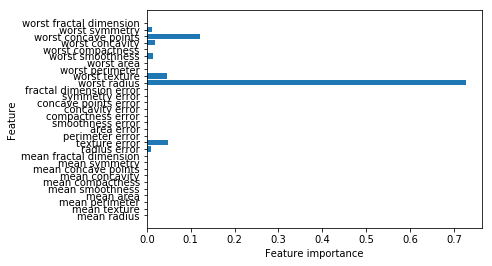

In [10]:
# 樹的特徵重要性
print("Feature importances:\n{}".format(tree.feature_importances_))

# 透過視覺化來看特徵重要性的這種方式，就和在線性模型中看係數的方式一樣
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Text(0,0.5,'Feature 1')

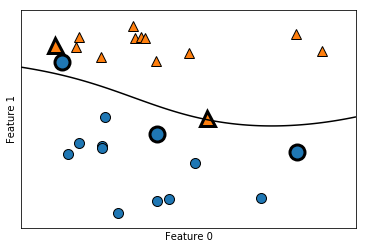

In [11]:
# 了解 SVMs
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
# 繪制支援向量
sv = svm.support_vectors_
# 用雙重系數的符號給予支援向量的類別標籤
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")